<center>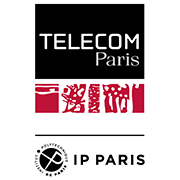</center>

<h1><center><strong><font color="green">IGR204 Visualisation<br/>Projet Baby name</font></strong></center></h1>

<h3><center><font color="blue"><strong>Groupe U</strong></font></center></h3>

<center>
<h3> Project student</h3>
<a>Nicolas Allègre</a> <email>nicolas.allegre@telecom-paris.fr</email><br>
<a>Romain Donné</a> <email>romain.donne@telecom-paris.fr</email><br>
<a>Aude De Fornel</a> <email>aude.defornel@telecom-paris.fr</email><br>
<a>François-Xavier Morel</a> <email>francois-xavier.morel@telecom-paris.fr</email><br>
<a>Camille Ishac</a> <email>camille.ishac@telecom-paris.fr</email><br>

<br/>
Année 2024-2025
</center>

------------------------

### Table of Contents

* [Chapter 0 Préparation](#0---préparation)
* [Chapter 4 - AMR](#4---amr)

<!-- <a class="anchor" id="0---code-python-initial"></a> -->

# <font color="green">**0 - Préparation**</font>

## 0.1) Partie code Python initial (import)

In [ ]:
# python -m pip install matplotlib numpy tabulate altair geopandas

###############################################################################
# IMPORTS :
# /* Modules standards */
import importlib
import os
import sys
from pprint import pprint
from zipfile import ZipFile

# /* Modules externes */
import altair as alt
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
import pandas as pd
from tabulate import tabulate

# /* Modules internes */

###############################################################################
# CONSTANTES :
DATA_FOLDER = "../data"
DATA_ZIP = "Names hints.zip"
DATA_FILENAME = "dpt2020.csv"
GEO_FILENAME = "departements-version-simplifiee.geojson"

WIDTH = 600
HEIGHT = 600

_ = alt.data_transformers.enable('json') # Let Altair/Vega-Lite work with large data sets


In [5]:
# Chargement du ZIP
zip_filenames = {}
filepath = os.path.join(DATA_FOLDER, DATA_ZIP)
zip_file = ZipFile(filepath)
for filename in [x.filename for x in zip_file.infolist()]:
    if DATA_FILENAME in filename:
        zip_filenames["data_path"] = filename
    elif GEO_FILENAME in filename:
        zip_filenames["geo_path"] = filename

# Chargement des données :
names = pd.read_csv(zip_file.open(zip_filenames["data_path"]), sep=";")

# Chargement de la cartographie :
depts = gpd.read_file(zip_file.open(zip_filenames["geo_path"]))

# Suppression des entrées sans prénom :
names.drop(names[names.preusuel == '_PRENOMS_RARES'].index, inplace=True)

# Suppression des entrées sans date :
names.drop(names[names.dpt == 'XX'].index, inplace=True)


# <font color="green">**1 - Visualisation 1 : évolution des prénoms d’enfant, au cours du temps**</font>

La première visualisation concerne l'évolution temporelle des nommages d'enfants dans la France de 1900 à 2020.

Notamment, elle devrait permettre à répondre :
- Combien les noms d'enfant évoluent au cours du temps ?
- Y-a-t-il des noms qui sont perpertuellement populaire et non populaire ?
- Des tendances temporelles sont-elles présentes dans les noms d'enfant ?


Notre but est d'approcher notre proposition de visualisation avancé P1.12.

### 1.1) Étape 1 : élaboration des graphiques individuels nécessaires

#### **P1.2_GLOBAUX distribution de la popularité au travers les âges**

Graphique représentant une distribution sur la quantité de prénom issu d’une comptabilisation du nombre d’année qu’un prénom a été choisi au cours d’une année.

Il servira pour notre réflexion interne

In [ ]:
# Code pour P1.2 et tout autres graphiques d'aide à la réflexion

#### **P1.1_GLOBAUX évolution moyenne au cours du temps**

Graphique représentant max,moyenne,médiane (voir sigma) avec le temps.

Ce graphique sera utilisé en début de notre visualisation avec une broche, permettant de réduire la fenêtre de temps.


In [ ]:
# Code pour P1.1

#### **P1.7_évolution au cours du temps de K prénoms**

Graphique similaire au précédent mais pour K prénom.

Ce graphique devra comprendre : une tooltip avec année,nb,nom,(?moy/med/sig?), la légende des noms


In [ ]:
# Code pour 1.7

#### **P1.4_Ranking des prénoms populaires et non populaires (K premiers & K derniers)**

Graphique représentant un classement des K premiers noms.

Nous allons nous focaliser d'abords à représenter la popularité.

Ce graphique doit comprendre : le nombre total, la position et le nom


#### **Graphiques dynamiques**

Si altair peut faire un graphique sous forme de vidéo, alors tester sur le P1.7.
- => P1.9_Top global des prénoms
- ou => P1.10_TOP locaux des prénoms


In [ ]:
# Code pour 1.9

### 1.2) Étape 2 : fusionner pour construire la visualisation

#### **P1.12_proposition de visualisation temporelle des prénoms d’enfant**

Dans un premier temps, avec des paramètres construire la visualisation.

Rappel disposition :
- en premier, le graphique général P1.1 sur toutes la largeur avec la possibilité de réduire le temps.
- le graphique des ranking de K prénom + nom donnée (P1.4)
- le graphique évolution des prénoms sélectionné (P1.7)

Progression :
- Dans un premier temps, grâce à des variables Python.
- Dans un second temps, si Altair le permet rajouter de la dynamique (clic de sélection, ...)


In [ ]:
# Code pour visualisaition 1

###############################################################################
## PARAMÈTRES DE VISU :
POPULAIRE = True  # Populaire ou non populaire
K = 5  # Nombre de prénoms à afficher
USERNAME = ""  # Vide ou donné
LIST_USERNAME = []  # liste spécique ou automatique TOP
SEXE = "all"  # "ALL", "M", "F"


###############################################################################
# 1.1 - Construire la liste des K users 
list_k_user_auto = []  # à partir dataset ordonnée croissante

# 1.2 - Filtrage pour avoir les noms à afficher
list_names = []
# Récupérer d'abords les prénoms donnés par l'utilisateur et compléter par les tops.
for i in range(K):
    if len(LIST_USERNAME) > i:
        list_names.append(LIST_USERNAME[i])
    elif len(list_k_user_auto) > i:
        list_names.append(list_k_user_auto.pop(0))
# Rajouter le nom spécial de l'utilisateur
if USERNAME != "":
    list_names.append(USERNAME)

###############################################################################


# <font color="green">**2 - Visualisation 2 : évolution des prénoms d’enfant, géographiquement**</font>

Le seconde visualisation concerne l'évolution géographique des nommages d'enfants dans la France métropolitaine de 1900 à 2020.

Notamment, elle devrait permettre à répondre :
- Y-a-t-il un effect régional ?
- Des noms sont plus populaires dans certaines régions ?
- Les noms populaires globalement le sont-ils dans toutes les régions française ?

Notre but est d'approcher notre proposition de visualisation avancé P2.6.

### 1.1) Étape 1 : élaboration des graphiques individuels nécessaires

#### **P2.1_GLOBAUX répartition moyenne de K prénoms en couleur**

Graphique représentant une sorte de heatmap des K prénoms sur une carte de la France.

Le graphique doit contenir : une tooltip pour chaque département (dpt,nom,nb)

In [ ]:
# Code P2.1

#### **P2.3_répartition d’un prénom en couleur (heatmap)**

Graphique représentant la heatmap d'un prénom sur la carte de la France.

In [ ]:
# Code P2.3

### 1.2) Étape 2 : fusionner pour construire la visualisation

#### **P2.6_proposition de visualisation temporelle des prénoms d’enfant**


Rappel disposition :
- en premier, une échelle de temps modifiable ou la France heatmap avec le temps modifiable.
- la heatmap des K top ou du prénom



In [ ]:
# Code pour visualisation 2

###############################################################################
## PARAMÈTRES DE VISU :
POPULAIRE = True  # Populaire ou non populaire
K = 5  # Nombre de prénoms à afficher
USERNAME = ""  # Vide ou donné
LIST_USERNAME = []  # liste spécique ou automatique TOP
LIST_DPT = []  # liste spécique ou automatique département
SEXE = "all"  # "ALL", "M", "F"


###############################################################################
# 1.1 - Construire la liste des K users 
list_k_user_auto = []  # à partir dataset ordonnée croissante

# 1.2 - Filtrage pour avoir les noms à afficher
list_names = []
# Récupérer d'abords les prénoms donnés par l'utilisateur et compléter par les tops.
for i in range(K):
    if len(LIST_USERNAME) > i:
        list_names.append(LIST_USERNAME[i])
    elif len(list_k_user_auto) > i:
        list_names.append(list_k_user_auto.pop(0))
# Rajouter le nom spécial de l'utilisateur
if USERNAME != "":
    list_names.append(USERNAME)

###############################################################################


# <font color="green">**3 - Visualisation 3 :  évolution des prénoms d’enfant, en fonction du sexe**</font>

La troisième visualisation concerne l'évolution genrée des nommages d'enfants dans la France de 1900 à 2020.

Notamment, elle devrait permettre à répondre à :
- Le sexe influe-t-il sur les évolutions des noms ?
- La popularité des noms évolue-t-elle similairement pour les deux sexes ?
